## 나라별, GDP별, OECD 국가와 비교

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
COVID = pd.read_excel('./owid-covid-data.xlsx')
COVID = COVID.fillna(0)
COVID.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


In [7]:
COVID['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [8]:
len(COVID['location'].unique())

243

In [14]:
np.quantile(COVID['gdp_per_capita'], q=0.1)

0.0

In [15]:
np.quantile( COVID['gdp_per_capita'], q=0.2)

1095.042

In [16]:
np.quantile( COVID['gdp_per_capita'], q=0.4)

5034.708

In [17]:
np.quantile( COVID['gdp_per_capita'], q=0.6)

13367.565

In [18]:
np.quantile( COVID['gdp_per_capita'], q=0.8)

28763.071

In [19]:
np.quantile( COVID['gdp_per_capita'], q=0.9)

44648.71

In [20]:
np.quantile( COVID['gdp_per_capita'], q=1)

116935.6

In [21]:
COVID[COVID['gdp_per_capita']>28763.071]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
8051,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.00,76.29,0.000,0.0,0.0,0.0,0.0
8052,ABW,North America,Aruba,2020-03-14,2.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.00,76.29,0.000,0.0,0.0,0.0,0.0
8053,ABW,North America,Aruba,2020-03-15,2.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.00,76.29,0.000,0.0,0.0,0.0,0.0
8054,ABW,North America,Aruba,2020-03-16,2.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.00,76.29,0.000,0.0,0.0,0.0,0.0
8055,ABW,North America,Aruba,2020-03-17,3.0,1.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.00,76.29,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174866,USA,North America,United States,2022-05-04,81620383.0,114308.0,61513.429,996704.0,1960.0,556.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
174867,USA,North America,United States,2022-05-05,81694580.0,74197.0,61635.000,996964.0,260.0,542.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
174868,USA,North America,United States,2022-05-06,81831854.0,137274.0,72666.857,997318.0,354.0,532.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
174869,USA,North America,United States,2022-05-07,81858744.0,26890.0,73172.714,997503.0,185.0,541.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0


In [22]:
(COVID[COVID['gdp_per_capita']>28763.071])['location'].unique()

array(['Aruba', 'Australia', 'Austria', 'Bahrain', 'Belgium', 'Bermuda',
       'Brunei', 'Canada', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hong Kong',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait',
       'Lithuania', 'Luxembourg', 'Macao', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Puerto Rico', 'Qatar',
       'San Marino', 'Saudi Arabia', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [23]:
len((COVID[COVID['gdp_per_capita']>28763.071])['location'].unique())
#46개국#20퍼

46

In [24]:
(COVID[COVID['gdp_per_capita']>44648.71])['location'].unique()
#44648.71

array(['Austria', 'Bermuda', 'Brunei', 'Cayman Islands', 'Denmark',
       'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Kuwait',
       'Luxembourg', 'Macao', 'Netherlands', 'Norway', 'Qatar',
       'San Marino', 'Saudi Arabia', 'Singapore', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United States'], dtype=object)

In [25]:
len((COVID[COVID['gdp_per_capita']>44648.71])['location'].unique())
#22개국 #10퍼

22

---

## 한국

In [67]:
COVID_KOR=COVID[COVID['iso_code'] == 'KOR']
COVID_KOR

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
154398,KOR,Asia,South Korea,2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154399,KOR,Asia,South Korea,2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154400,KOR,Asia,South Korea,2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154401,KOR,Asia,South Korea,2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154402,KOR,Asia,South Korea,2020-01-26,3.0,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,43.4,0.17,2.47,0.845918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155231,KOR,Asia,South Korea,2022-05-04,17438068.0,42277.0,50206.000,23158.0,79.0,98.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
155232,KOR,Asia,South Korea,2022-05-05,17464782.0,26714.0,38595.143,23206.0,48.0,68.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
155233,KOR,Asia,South Korea,2022-05-06,17504334.0,39552.0,38065.143,23289.0,83.0,70.714,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
155234,KOR,Asia,South Korea,2022-05-07,17544398.0,40064.0,38392.714,23360.0,71.0,69.286,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000


In [68]:
X = COVID_KOR[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_KOR['new_deaths']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

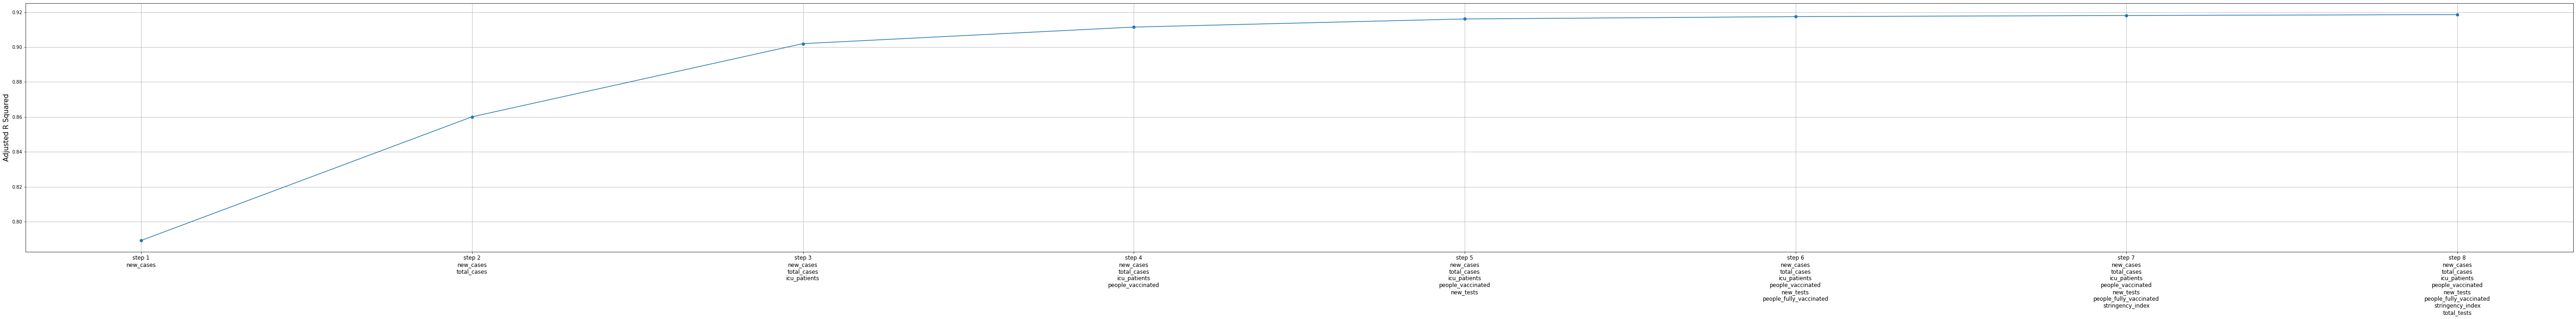

In [70]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [71]:
selected_variables

['new_cases',
 'total_cases',
 'icu_patients',
 'people_vaccinated',
 'new_tests',
 'people_fully_vaccinated',
 'stringency_index',
 'total_tests']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [75]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     945.2
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        04:42:45   Log-Likelihood:                -2953.8
No. Observations:                 670   AIC:                             5926.
Df Residuals:                     661   BIC:                             5966.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [76]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  19.880875382057294
RMSE of Test Data:  19.224791084028162


In [65]:
y, X = dmatrices('new_deaths ~new_cases+total_cases+icu_patients+people_vaccinated+new_tests+weekly_hosp_admissions+total_boosters+total_boosters', COVID, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,1.057232,Intercept
1,2.651356,new_cases
2,6.084730,total_cases
3,7.737982,icu_patients
4,3.939071,people_vaccinated
5,1.351675,new_tests
6,8.002104,weekly_hosp_admissions
7,2.700107,total_boosters


## 전세계

In [77]:
X = COVID[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID['new_deaths']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

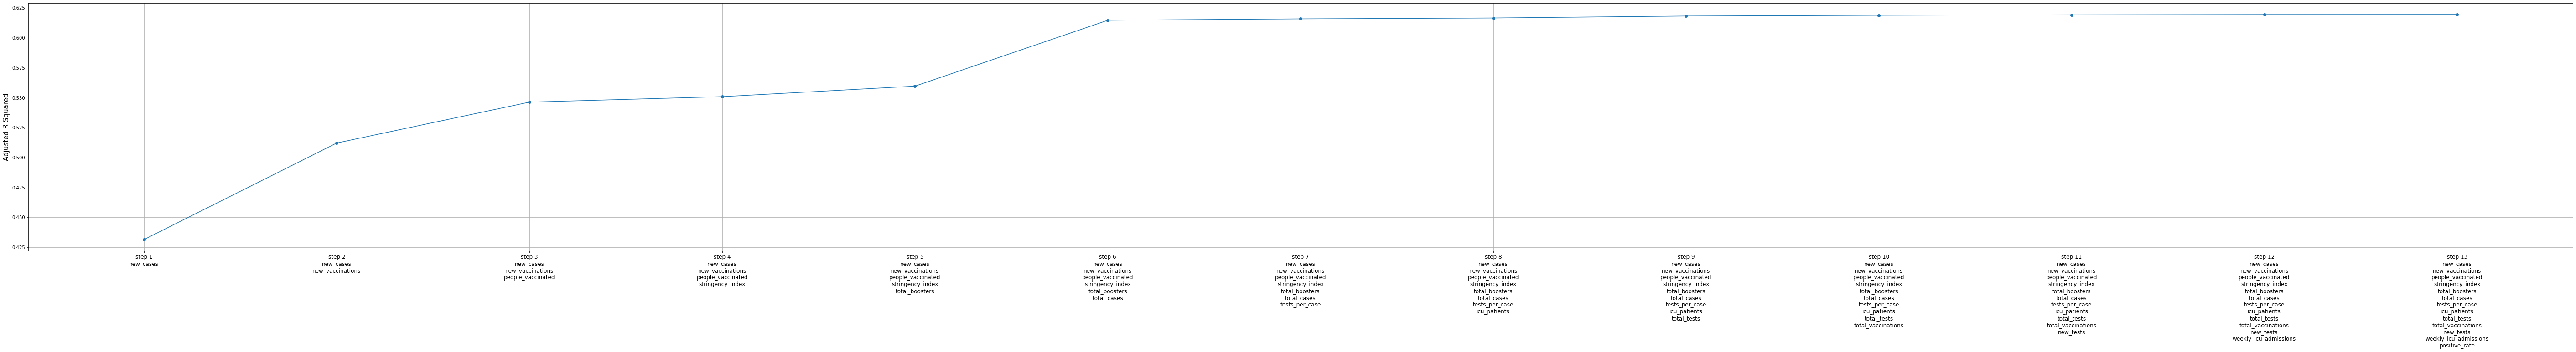

In [79]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [81]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 1.851e+04
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        04:57:07   Log-Likelihood:            -1.1162e+06
No. Observations:              147790   AIC:                         2.232e+06
Df Residuals:                  147776   BIC:                         2.233e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    97.21

In [82]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  461.0904031264203
RMSE of Test Data:  461.96359591758306


---

## gdp 상위 10퍼

In [83]:
COVID_upper_10percent=COVID[COVID['gdp_per_capita']>44648.71]
COVID_upper_10percent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
10510,AUT,Europe,Austria,2020-02-25,2.0,2.0,0.000,0.0,0.0,0.000,...,28.4,30.9,0.0,7.37,81.54,0.922,0.0,0.0,0.0,0.0
10511,AUT,Europe,Austria,2020-02-26,2.0,0.0,0.000,0.0,0.0,0.000,...,28.4,30.9,0.0,7.37,81.54,0.922,0.0,0.0,0.0,0.0
10512,AUT,Europe,Austria,2020-02-27,3.0,1.0,0.000,0.0,0.0,0.000,...,28.4,30.9,0.0,7.37,81.54,0.922,0.0,0.0,0.0,0.0
10513,AUT,Europe,Austria,2020-02-28,3.0,0.0,0.000,0.0,0.0,0.000,...,28.4,30.9,0.0,7.37,81.54,0.922,0.0,0.0,0.0,0.0
10514,AUT,Europe,Austria,2020-02-29,9.0,6.0,0.000,0.0,0.0,0.000,...,28.4,30.9,0.0,7.37,81.54,0.922,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174866,USA,North America,United States,2022-05-04,81620383.0,114308.0,61513.429,996704.0,1960.0,556.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
174867,USA,North America,United States,2022-05-05,81694580.0,74197.0,61635.000,996964.0,260.0,542.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
174868,USA,North America,United States,2022-05-06,81831854.0,137274.0,72666.857,997318.0,354.0,532.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
174869,USA,North America,United States,2022-05-07,81858744.0,26890.0,73172.714,997503.0,185.0,541.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0


In [84]:
X = COVID_upper_10percent[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_upper_10percent['new_deaths']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

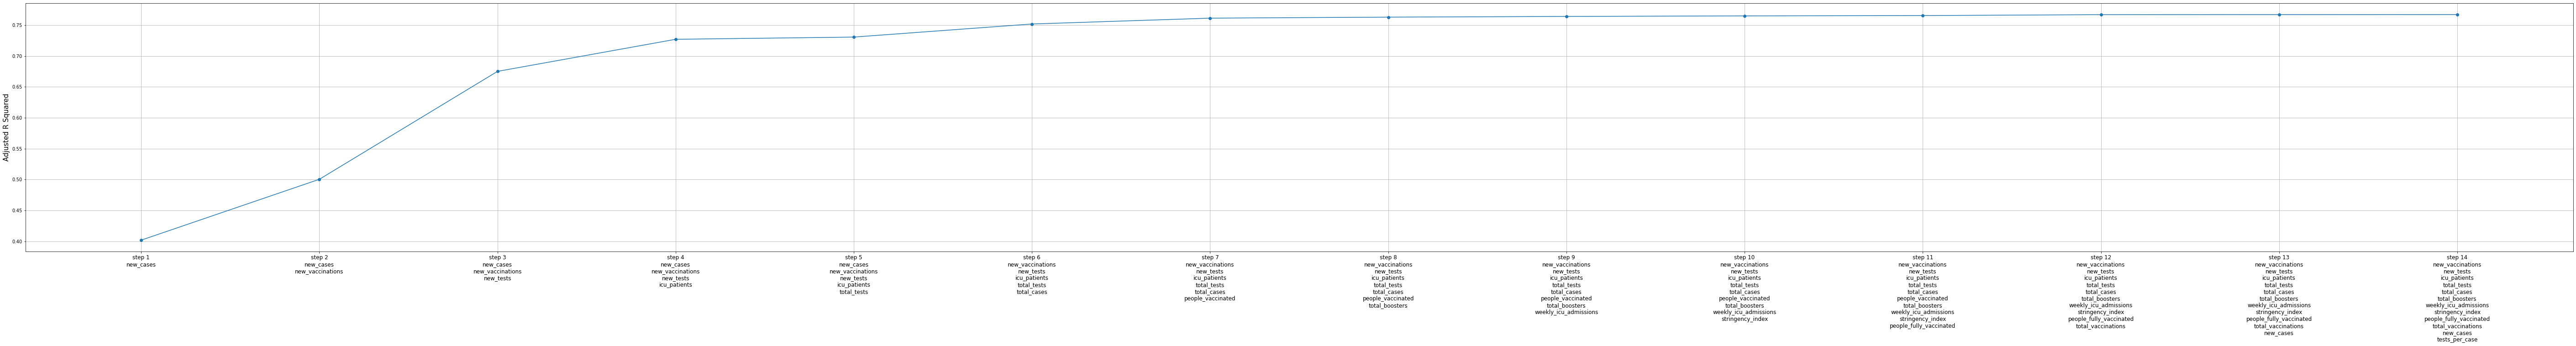

In [86]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [88]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     3918.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        04:58:12   Log-Likelihood:                -92797.
No. Observations:               14280   AIC:                         1.856e+05
Df Residuals:                   14267   BIC:                         1.857e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [89]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  160.69045493263738
RMSE of Test Data:  157.04756375742275


---

## gdp 하위 20퍼

In [90]:
COVID_lower20percent=COVID[COVID['gdp_per_capita']<1095.042]
COVID_lower20percent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
805,OWID_AFR,0,Africa,2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
806,OWID_AFR,0,Africa,2020-02-14,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
807,OWID_AFR,0,Africa,2020-02-15,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
808,OWID_AFR,0,Africa,2020-02-16,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
809,OWID_AFR,0,Africa,2020-02-17,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181574,WLF,Oceania,Wallis and Futuna,2022-05-05,454.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,79.94,0.0,0.0,0.0,0.0,0.0
181575,WLF,Oceania,Wallis and Futuna,2022-05-06,454.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,79.94,0.0,0.0,0.0,0.0,0.0
181576,WLF,Oceania,Wallis and Futuna,2022-05-07,454.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,79.94,0.0,0.0,0.0,0.0,0.0
181577,WLF,Oceania,Wallis and Futuna,2022-05-08,454.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,79.94,0.0,0.0,0.0,0.0,0.0


In [91]:
X = COVID_lower20percent[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_lower20percent['new_deaths']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

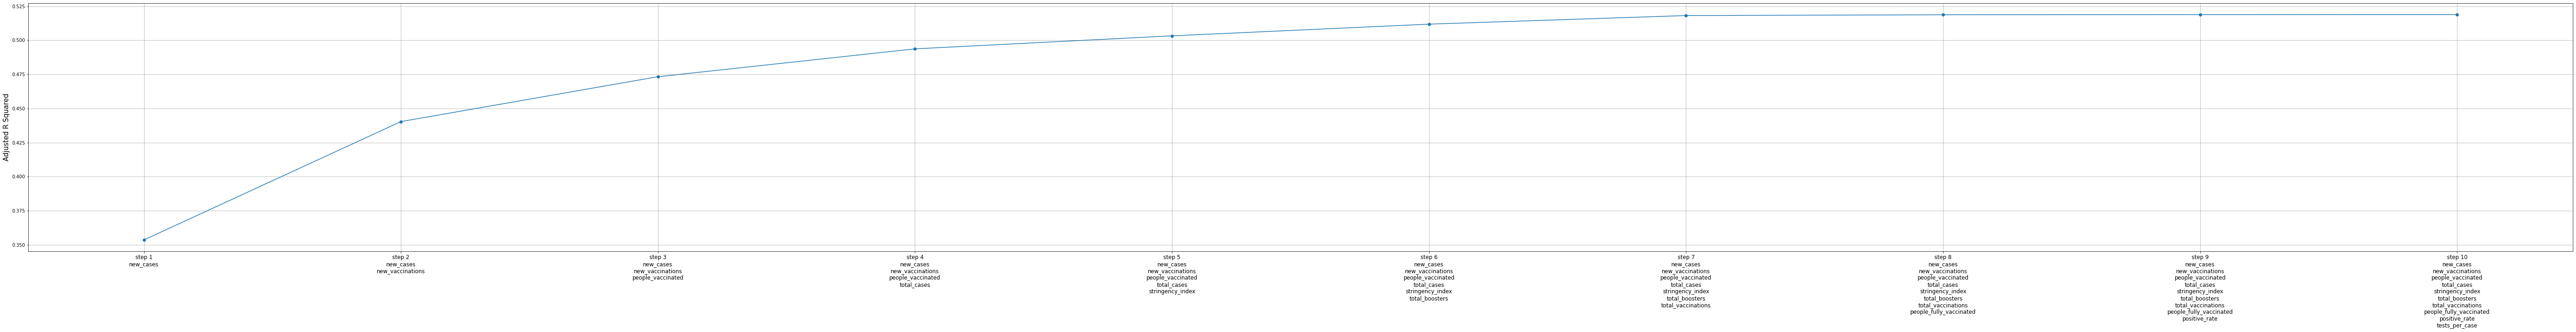

In [93]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [95]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3149.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        05:00:28   Log-Likelihood:            -2.3301e+05
No. Observations:               29192   AIC:                         4.660e+05
Df Residuals:                   29181   BIC:                         4.661e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [96]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  708.454088451296
RMSE of Test Data:  745.6027676883099


## 미국

In [125]:
COVID_USA=COVID[COVID['iso_code'] == 'USA']
COVID_USA


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
174033,USA,North America,United States,2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174034,USA,North America,United States,2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174035,USA,North America,United States,2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174036,USA,North America,United States,2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174037,USA,North America,United States,2020-01-26,5.0,3.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,-8926.0,-3.59,-2.63,-26.811643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174866,USA,North America,United States,2022-05-04,81620383.0,114308.0,61513.429,996704.0,1960.0,556.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174867,USA,North America,United States,2022-05-05,81694580.0,74197.0,61635.000,996964.0,260.0,542.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174868,USA,North America,United States,2022-05-06,81831854.0,137274.0,72666.857,997318.0,354.0,532.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174869,USA,North America,United States,2022-05-07,81858744.0,26890.0,73172.714,997503.0,185.0,541.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000


In [126]:
COVID_USA['continent'].unique()

array(['North America'], dtype=object)

In [127]:
X = COVID_USA[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_USA['new_deaths']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

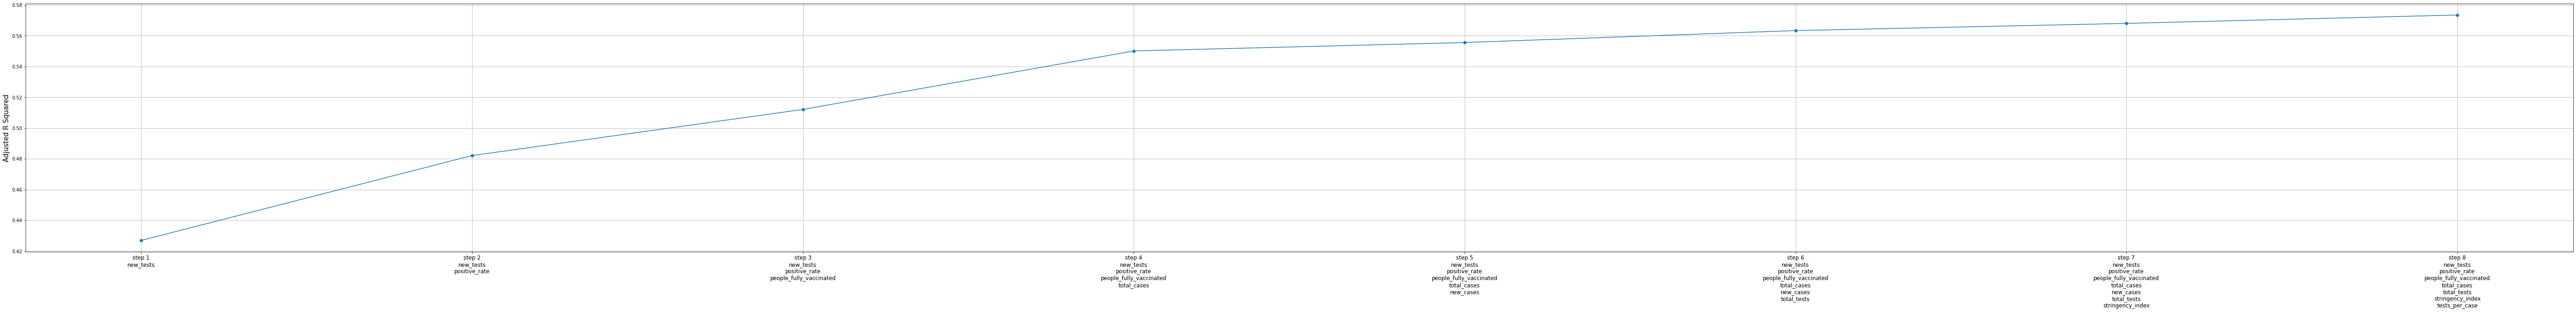

In [129]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [131]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     129.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.56e-119
Time:                        11:51:14   Log-Likelihood:                -5271.9
No. Observations:                 670   AIC:                         1.056e+04
Df Residuals:                     662   BIC:                         1.060e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [132]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  632.3980181312103
RMSE of Test Data:  634.0618525958567


## 일본

In [103]:
COVID_JPN=COVID[COVID['iso_code'] == 'JPN']
COVID_JPN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
84669,JPN,Asia,Japan,2020-01-22,2.0,0.0,0.000,0.0,0.0,0.000,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
84670,JPN,Asia,Japan,2020-01-23,2.0,0.0,0.000,0.0,0.0,0.000,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
84671,JPN,Asia,Japan,2020-01-24,2.0,0.0,0.000,0.0,0.0,0.000,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
84672,JPN,Asia,Japan,2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
84673,JPN,Asia,Japan,2020-01-26,4.0,2.0,0.000,0.0,0.0,0.000,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85502,JPN,Asia,Japan,2022-05-04,7974232.0,26414.0,29462.143,29706.0,20.0,33.857,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
85503,JPN,Asia,Japan,2022-05-05,7994944.0,20712.0,26468.000,29724.0,18.0,30.857,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
85504,JPN,Asia,Japan,2022-05-06,8016485.0,21541.0,24315.857,29761.0,37.0,29.714,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0
85505,JPN,Asia,Japan,2022-05-07,8055713.0,39228.0,26351.429,29788.0,27.0,31.571,...,11.2,33.7,0.0,13.05,84.63,0.919,0.0,0.0,0.0,0.0


In [104]:
X = COVID_JPN[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_JPN['new_deaths']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

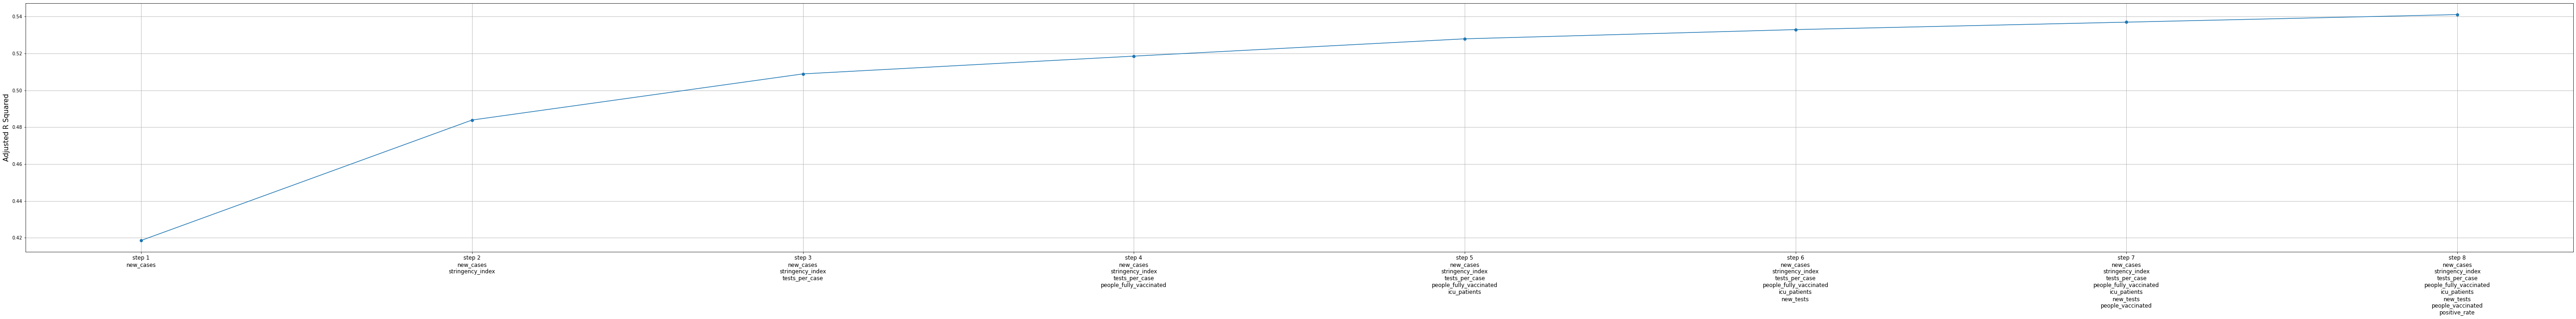

In [106]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [108]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     99.59
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.08e-108
Time:                        05:03:26   Log-Likelihood:                -3258.7
No. Observations:                 670   AIC:                             6535.
Df Residuals:                     661   BIC:                             6576.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [109]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  31.338714782807102
RMSE of Test Data:  31.978563016944086


## 중국

In [110]:
COVID_CHN=COVID[COVID['iso_code'] == 'CHN']
COVID_CHN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
34280,CHN,Asia,China,2020-01-22,547.0,0.0,0.000,17.0,0.0,0.000,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
34281,CHN,Asia,China,2020-01-23,639.0,92.0,0.000,18.0,1.0,0.000,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
34282,CHN,Asia,China,2020-01-24,916.0,277.0,0.000,26.0,8.0,0.000,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
34283,CHN,Asia,China,2020-01-25,1399.0,483.0,0.000,42.0,16.0,0.000,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
34284,CHN,Asia,China,2020-01-26,2062.0,663.0,0.000,56.0,14.0,0.000,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35113,CHN,Asia,China,2022-05-04,1054103.0,14731.0,22565.571,5141.0,13.0,37.857,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
35114,CHN,Asia,China,2022-05-05,1067042.0,12939.0,20694.857,5153.0,12.0,32.857,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
35115,CHN,Asia,China,2022-05-06,1078720.0,11678.0,18241.286,5166.0,13.0,27.286,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0
35116,CHN,Asia,China,2022-05-07,1083187.0,4467.0,18682.143,5174.0,8.0,16.286,...,1.9,48.4,0.0,4.34,76.91,0.761,0.0,0.0,0.0,0.0


In [111]:
X = COVID_CHN[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_CHN['new_deaths']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

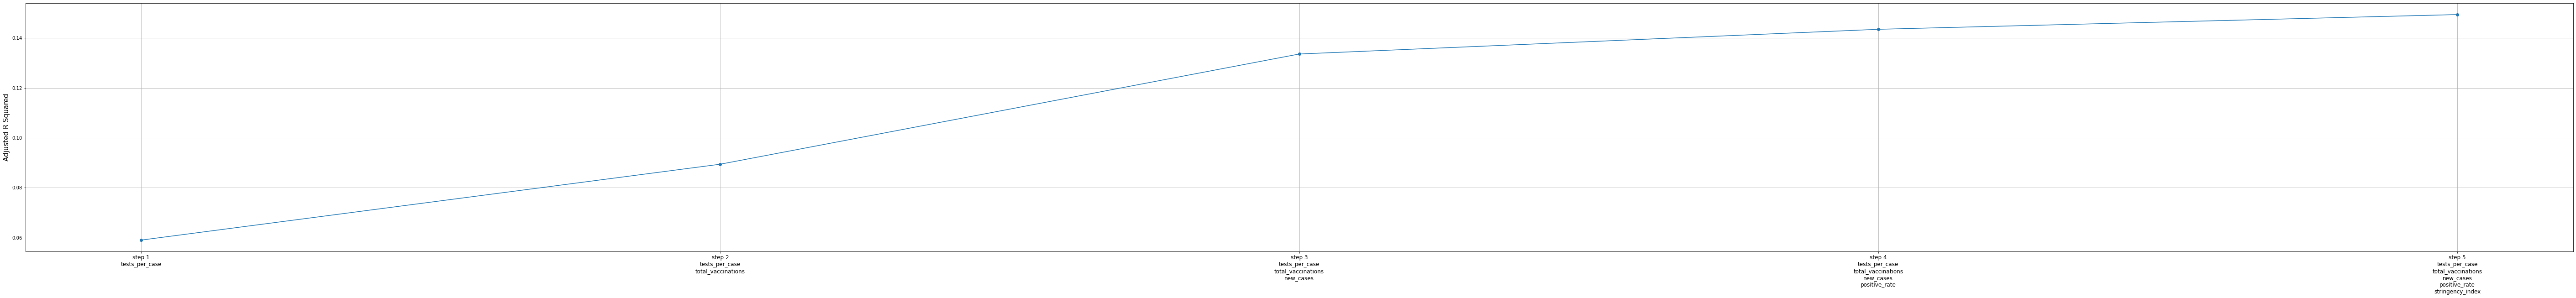

In [113]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [115]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     24.50
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.11e-22
Time:                        05:03:35   Log-Likelihood:                -2975.6
No. Observations:                 670   AIC:                             5963.
Df Residuals:                     664   BIC:                             5990.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1769      5

In [116]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  20.536252484144157
RMSE of Test Data:  10.520612078820534


## OECD

In [136]:
# oecd국가
#회원국(38개국) : 오스트리아, 벨기에, 캐나다, 덴마크, 프랑스, 독일, 그리스, 아이슬란드, 아일랜드, 이탈리아, 룩셈부르크, 네덜란드, 노르웨이, 포르투갈, 스페인, 스웨덴, 스위스, 터키, 영국, 미국, 일본, 핀란드, 호주, 뉴질랜드, 멕시코, 체코, 헝가리(1996), 폴란드(1996), 한국(1996), 슬로바키아(2000), 칠레(2010), 슬로베니아(2010), 에스토니아(2010), 이스라엘(2010), 라트비아(2016), 리투아니아(2018), 콜롬비아(2020), 코스타리카(2021)

In [117]:
OECD=['AUT','BEL','CAN','DNK','FRA','DEU','GRC','ISL','IRL','ITA','LUX','NLD','NOR','PRT','ESP','SWE','CHE','TUR','GBR','USA','JPN','FIN','AUS','NZL','MEX','CZE','HUN','POL','KOR','SVK','CHL','SVN','EST','ISR','LVA','LTU','COL','CRI']

In [118]:
COVID_oecd=COVID[COVID['iso_code'].isin(OECD)]
COVID_oecd

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
9676,AUS,Oceania,Australia,2020-01-26,4.0,4.0,0.000,0.0,0.0,0.000,...,13.0,16.5,0.0,3.84,83.44,0.944,-47.0,-0.4,2.8,-1.822538
9677,AUS,Oceania,Australia,2020-01-27,5.0,1.0,0.000,0.0,0.0,0.000,...,13.0,16.5,0.0,3.84,83.44,0.944,0.0,0.0,0.0,0.000000
9678,AUS,Oceania,Australia,2020-01-28,5.0,0.0,0.000,0.0,0.0,0.000,...,13.0,16.5,0.0,3.84,83.44,0.944,0.0,0.0,0.0,0.000000
9679,AUS,Oceania,Australia,2020-01-29,6.0,1.0,0.000,0.0,0.0,0.000,...,13.0,16.5,0.0,3.84,83.44,0.944,0.0,0.0,0.0,0.000000
9680,AUS,Oceania,Australia,2020-01-30,9.0,3.0,0.000,0.0,0.0,0.000,...,13.0,16.5,0.0,3.84,83.44,0.944,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174866,USA,North America,United States,2022-05-04,81620383.0,114308.0,61513.429,996704.0,1960.0,556.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.000000
174867,USA,North America,United States,2022-05-05,81694580.0,74197.0,61635.000,996964.0,260.0,542.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.000000
174868,USA,North America,United States,2022-05-06,81831854.0,137274.0,72666.857,997318.0,354.0,532.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.000000
174869,USA,North America,United States,2022-05-07,81858744.0,26890.0,73172.714,997503.0,185.0,541.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.000000


In [119]:
X = COVID_oecd[['total_cases','new_cases', 'icu_patients','weekly_icu_admissions','total_tests','new_tests','positive_rate','tests_per_case',
'total_vaccinations','people_vaccinated','people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index']]
y = COVID_oecd['new_deaths']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

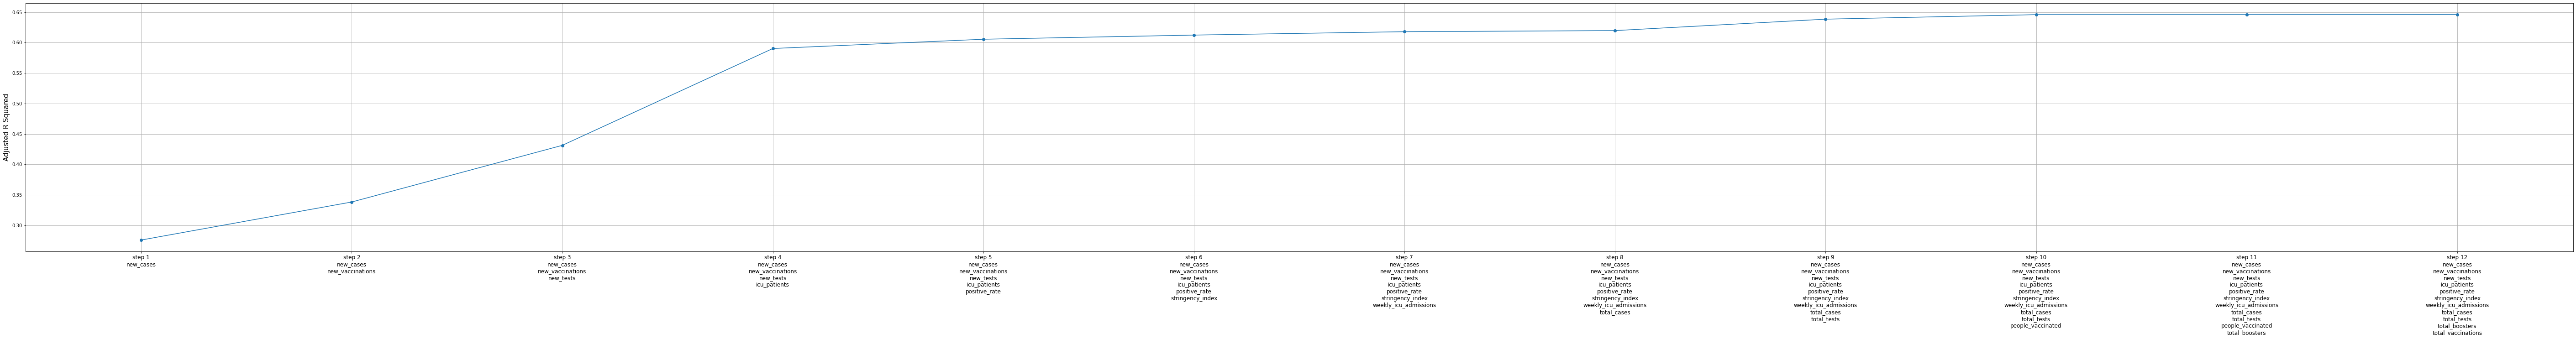

In [121]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_variables], y, test_size=0.2, random_state=13)

In [123]:
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     4111.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        05:03:46   Log-Likelihood:            -1.6170e+05
No. Observations:               24776   AIC:                         3.234e+05
Df Residuals:                   24764   BIC:                         3.235e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -70.77

In [124]:
from sklearn.metrics import mean_squared_error


reg = LinearRegression()
reg.fit(X_train[selected_variables], y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  165.28077010433412
RMSE of Test Data:  182.07375697972208
